In [6]:
shape_cat=""
vol=""
z_range=""

In [32]:
# Parameters
shape_cat = "mcal"
vol = "vlim"
z_range = "all_z"


In [33]:
#This header file contains all the common packages
%matplotlib inline
%run /global/project/projectdirs/des/zhou/sa/lib/src/header.py $shape_cat $vol $z_range 
matplotlib.rcParams.update({'font.size': 11}) 


In [9]:
print(len(clusters))
print(len(shapes))

4322
105029


In [10]:
# Print the numbers of galaxies that needed to be masked

assert np.sum(shapes[('All','e1')]==-9999)==0
assert np.sum(shapes[('All','e2')]==-9999)==0
assert np.sum(shapes['All','flags_select'])==0
assert np.sum(shapes[('All','PP')]<=0.55)==0

In [11]:
#masking
print(len(clusters))
print(len(shapes))

4322
105029


In [12]:
center_ids=clusters[('Alt','Alt1','ID_CENT')]
center_mask=~np.in1d(shapes.index,center_ids)
shapes=shapes[center_mask]

# Stats of e1,e2

count    100706.000000
mean         -0.000866
std           0.151945
min          -0.693726
25%          -0.079821
50%          -0.000530
75%           0.077980
max           0.775665
Name: (All, e2), dtype: float64

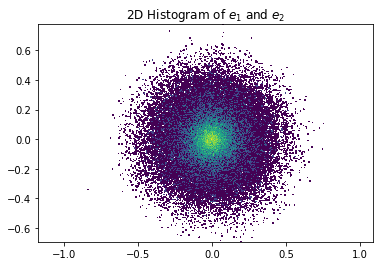

In [13]:
from matplotlib.colors import LogNorm 
plt.hist2d(shapes['All','e1'],shapes['All','e2'],bins=500,norm=LogNorm())
plt.axis('equal')
plt.title("2D Histogram of $e_1$ and $e_2$")
pd.Series(shapes['All','e1']).describe()
pd.Series(shapes['All','e2']).describe()

count    100706.000000
mean          1.534623
std         314.283566
min      -20097.585018
25%          -1.008109
50%          -0.000062
75%           1.000345
max       67310.028672
dtype: float64

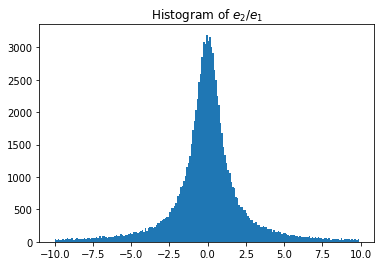

In [15]:
#statistics and hisgoram of e2/e1
plt.hist(shapes['All','e2']/shapes['All','e1'],bins=np.arange(-10,10,0.1))
plt.title("Histogram of $e_2$/$e_1$")
pd.Series(shapes['All','e2']/shapes['All','e1']).describe()

# Get phi 

In [16]:
def get_std_err_of_mean(np_array):
    mean=np_array.mean()
    std=np_array.std()
    n=len(np_array)
    return(std/np.sqrt(n))

In [17]:
phi_1d=shapes[('All','phi')]

## Stats for unweighted

In [18]:
pd.Series(phi_1d).describe()
print("Mean:{:05e} \nStdE:{:05e} ".format(phi_1d.mean(),phi_1d.std()/np.sqrt(len(phi_1d))))

Mean:4.502443e+01 
StdE:8.191168e-02 


In [27]:
def plt_phi(df,label_):
    phi_1d=df[('All','phi')]
    plt.figure(figsize=[6.2,5])
    plt.hist(phi_1d,bins=9,weights=df[('All','PP')],histtype="step",density=True,label=label_)
    plt.title("Histogram of $\phi$ weighted by membership probability")
    plt.xlabel(r"$\phi$[Degree]",fontsize=8)
    plt.ylabel(r"Probability",fontsize=8)
    plt.savefig('phi.eps', format='eps')
    pd.Series(phi_1d).describe()

In [28]:
np.std(phi_1d)/np.sqrt(len(phi_1d))

0.08191127598178208

In [29]:
pd.Series(phi_1d).describe()

count    100706.000000
mean         45.024435
std          25.994024
min           0.001127
25%          22.500805
50%          45.132546
75%          67.558285
max          89.998856
Name: (All, phi), dtype: float64

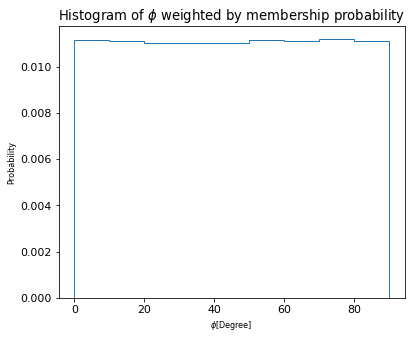

In [36]:
plt_phi(shapes,"All")
plt.savefig('/global/project/projectdirs/des/zhou/sa/images/phi_hist.pdf')

# Get e

## Statistics of e1 and e2

In [80]:
e1=shapes[('All','e1')].to_numpy()
shapes[('All','e1')].describe()

count    100706.000000
mean         -0.000001
std           0.151157
min          -0.838272
25%          -0.077810
50%          -0.000371
75%           0.077960
max           0.756333
Name: (All, e1), dtype: float64

In [81]:
e2=shapes[('All','e1')].to_numpy()
shapes[('All','e2')].describe()

count    100706.000000
mean         -0.000866
std           0.151945
min          -0.693726
25%          -0.079821
50%          -0.000530
75%           0.077980
max           0.775665
Name: (All, e2), dtype: float64

In [82]:
# np.save("/global/project/projectdirs/des/zhou/sa/data/{}/e_array".format(dir_string),e_list)

In [83]:
e_p_1d=shapes[('All','ep')]
e_x_1d=shapes[('All','ex')]

mean=1.680415e-04, std_mean=4.773311e-04


count    100706.000000
mean          0.000168
std           0.151477
min          -0.754594
25%          -0.078482
50%           0.000337
75%           0.079014
max           0.702016
Name: (All, ep), dtype: float64

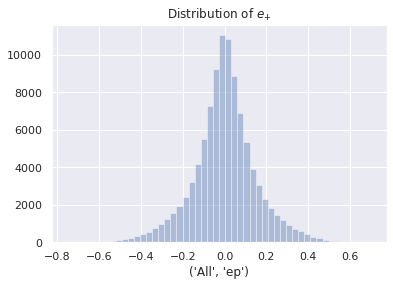

In [84]:
ax=sns.distplot(e_p_1d,kde=False)
ax.set_title("Distribution of $e_{+}$")
print ("mean={:05e}, std_mean={:05e}".format(e_p_1d.mean(),get_std_err_of_mean(e_p_1d)))
pd.Series(e_p_1d).describe()

mean=-6.078009e-04, std_mean=4.778047e-04


count    100706.000000
mean         -0.000608
std           0.151628
min          -0.704117
25%          -0.079051
50%          -0.000650
75%           0.078020
max           0.729156
Name: (All, ex), dtype: float64

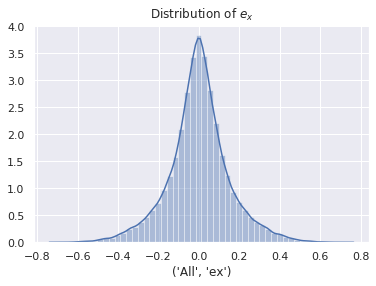

In [85]:
ax=sns.distplot(e_x_1d)
ax.set_title("Distribution of $e_{x}$")
print ("mean={:05e}, std_mean={:05e}".format(e_x_1d.mean(),get_std_err_of_mean(e_x_1d)))
pd.Series(e_x_1d).describe()

# Percentile Data

In [86]:
def get_R_percent(lower,upper):
    R_lower=shapes[('All','R')].quantile(lower)
    R_upper=shapes[('All','R')].quantile(upper)
    R_selected=shapes[(shapes[('All','R')]>=R_lower)&(shapes[('All','R')]<=R_upper) ]
    return(R_selected)

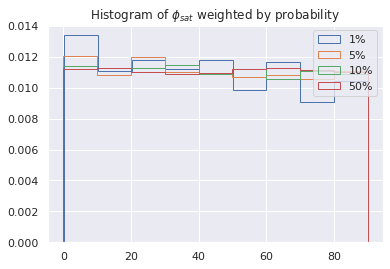

In [87]:
plt_phi(get_R_percent(0,0.01),"1%")
plt_phi(get_R_percent(0,0.05),"5%")
plt_phi(get_R_percent(0,0.1),"10%")
plt_phi(get_R_percent(0,0.5),"50%")
plt.legend()

Text(0.5, 1.0, '$e_+$ for R percentile [0,5%]')

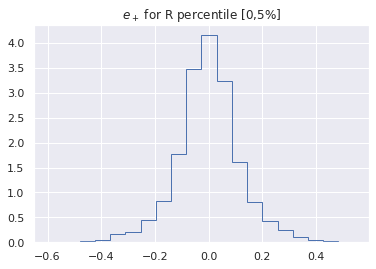

In [88]:
plt.hist(get_R_percent(0,0.05)[('All','ep')],bins=20,density=True,histtype="step")
plt.title(r"$e_+$ for R percentile [0,5%]")

In [89]:
get_R_percent(0,0.11)[('All','ep')].mean()

-0.001692134803782317